In [1]:
!unzip -o face_detection.zip -d face_detection

Archive:  face_detection.zip
  inflating: face_detection/fddb_dataset_YOLO/dataset.yaml  
  inflating: face_detection/fddb_dataset_YOLO/images/train/2002_07_19_big_img_130.jpg  
  inflating: face_detection/fddb_dataset_YOLO/images/train/2002_07_19_big_img_158.jpg  
  inflating: face_detection/fddb_dataset_YOLO/images/train/2002_07_19_big_img_160.jpg  
  inflating: face_detection/fddb_dataset_YOLO/images/train/2002_07_19_big_img_18.jpg  
  inflating: face_detection/fddb_dataset_YOLO/images/train/2002_07_19_big_img_209.jpg  
  inflating: face_detection/fddb_dataset_YOLO/images/train/2002_07_19_big_img_247.jpg  
  inflating: face_detection/fddb_dataset_YOLO/images/train/2002_07_19_big_img_254.jpg  
  inflating: face_detection/fddb_dataset_YOLO/images/train/2002_07_19_big_img_255.jpg  
  inflating: face_detection/fddb_dataset_YOLO/images/train/2002_07_19_big_img_269.jpg  
  inflating: face_detection/fddb_dataset_YOLO/images/train/2002_07_19_big_img_352.jpg  
  inflating: face_detection/fdd

In [2]:
!ls face_detection
!find face_detection -maxdepth 2 -type d

fddb_dataset_YOLO
face_detection
face_detection/fddb_dataset_YOLO
face_detection/fddb_dataset_YOLO/labels
face_detection/fddb_dataset_YOLO/images


In [3]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "GPU yok")

True
NVIDIA GeForce RTX 3090


In [4]:
!find face_detection/fddb_dataset_YOLO -maxdepth 2 -type d

face_detection/fddb_dataset_YOLO
face_detection/fddb_dataset_YOLO/labels
face_detection/fddb_dataset_YOLO/labels/val
face_detection/fddb_dataset_YOLO/labels/train
face_detection/fddb_dataset_YOLO/labels/.ipynb_checkpoints
face_detection/fddb_dataset_YOLO/images
face_detection/fddb_dataset_YOLO/images/val
face_detection/fddb_dataset_YOLO/images/train


In [5]:
%%writefile face.yaml
path: face_detection/fddb_dataset_YOLO
train: images/train
val: images/val

nc: 1
names: ["face"]

Overwriting face.yaml


In [6]:
!cat face.yaml

path: face_detection/fddb_dataset_YOLO
train: images/train
val: images/val

nc: 1
names: ["face"]


In [7]:
#Baseline Model Eğitimi
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="face.yaml",
    epochs=20,
    imgsz=640,
    batch=16,
    device=0
);

New https://pypi.org/project/ultralytics/8.4.7 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.4.6 🚀 Python-3.12.3 torch-2.10.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24115MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=face.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train17, nbs=64, nms=False, opset=None

/home/q/Desktop/youtube/sude/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 400.4±163.5 MB/s, size: 19.3 KB)
val: Scanning /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/labels/val.cache... 567 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 567/567 32.6Mit/s 0.0s
Plotting labels to /home/q/.pyenv/runs/detect/train17/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: MuSGD(lr=0.002, momentum=0.9) with parameter groups 0 weight(decay=0.0), 0 weight(decay=0.0005), 0 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/q/.pyenv/runs/detect/train17
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/20      2.11G       1.34      2.497       1.43         28        640: 100% ━━━━━━━━━━━━ 143/143 7.5it/s 19.0s0.1s
                 Class     Images  Instances     

In [8]:
#Baseline Model ile Doğrulama Setinde Tahmin (Inference)
from ultralytics import YOLO

model = YOLO("/home/q/.pyenv/runs/detect/train/weights/best.pt")

model.predict(
    source="face_detection/fddb_dataset_YOLO/images/val",
    save=True,
    conf=0.25
)


image 1/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_135.jpg: 640x480 2 faces, 36.5ms
image 2/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_141.jpg: 640x512 1 face, 38.6ms
image 3/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_198.jpg: 640x480 1 face, 4.7ms
image 4/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_230.jpg: 640x448 1 face, 38.6ms
image 5/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_278.jpg: 448x640 2 faces, 36.4ms
image 6/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_300.jpg: 640x448 1 face, 5.1ms
image 7/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_392.jpg: 512x640 1 face, 36.4ms
image 8/567 /home/q/Desktop/youtube/sude/face_d

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'face'}
 obb: None
 orig_img: array([[[144, 146, 154],
         [144, 146, 154],
         [144, 146, 154],
         ...,
         [ 71, 104, 120],
         [ 69, 102, 118],
         [ 67, 100, 116]],
 
        [[144, 146, 154],
         [144, 146, 154],
         [144, 146, 154],
         ...,
         [ 69, 102, 118],
         [ 68, 101, 117],
         [ 68, 101, 117]],
 
        [[144, 146, 154],
         [144, 146, 154],
         [144, 146, 154],
         ...,
         [ 67, 100, 116],
         [ 68, 101, 117],
         [ 68, 101, 117]],
 
        ...,
 
        [[203, 227, 239],
         [202, 226, 238],
         [201, 225, 237],
         ...,
         [ 59,  58,  62],
         [ 69,  68,  72],
         [ 64,  63,  67]],
 
        [[207, 229, 240],
         [206, 228, 239],
         [205, 227, 238],
         ...,
         [ 58,  57, 

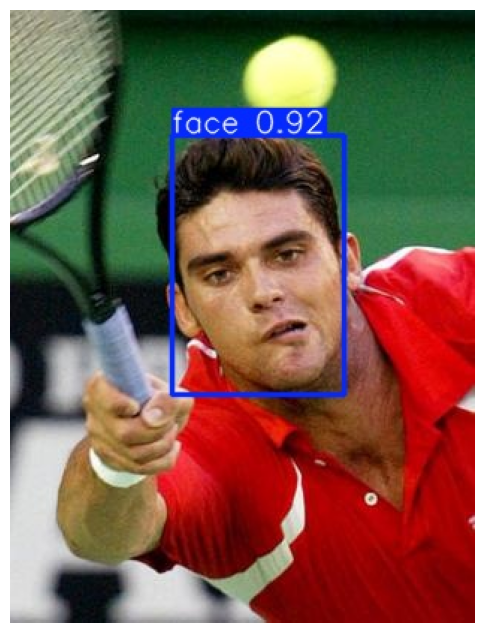

In [9]:
# Modelin çıktısını görsel olarak incelemek için örnek bir tahmin görüntüsünü açıyoruz.
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img_path = "/home/q/.pyenv/runs/detect/predict/2003_01_17_big_img_973.jpg"

img = Image.open(img_path)

plt.figure(figsize=(6, 8))
plt.imshow(img)
plt.axis("off")
plt.show()

In [14]:
def compute_metrics(TP, FP, FN, num_images):

    precision = TP / (TP + FP + 1e-6)
    recall    = TP / (TP + FN + 1e-6)
    f1        = 2 * precision * recall / (precision + recall + 1e-6)

    miss_rate = FN / (TP + FN + 1e-6)
    fppi = FP / num_images

    metrics = {
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "Miss_Rate": miss_rate,
        "FPPI": fppi
    }

    return metrics

num_images = len(results)

metrics = compute_metrics(
    TP=stats["TP"],
    FP=stats["FP"],
    FN=stats["FN"],
    num_images=num_images
)

print("\n= METRICS =")
for k, v in metrics.items():
    print(f"{k:10s}: {v:.4f}")


= METRICS =
Precision : 0.9389
Recall    : 0.9630
F1        : 0.9508
Miss_Rate : 0.0370
FPPI      : 0.1164


Recall çok yüksek

Recall ≈ 1015 / (1015 + 39) ≈ 0.963

- Model yüzlerin %96’sını yakalıyor.

Precision da iyi

Precision ≈ 1015 / (1015 + 66) ≈ 0.939

- Yanlış alarm oranı düşük.

Miss Rate %3.7

- Bu FDDB standardında kullanılan ana metriklerden biri. %3–4 arası

FPPI 0.116

- Ortalama her 9–10 görüntüde 1 yanlış alarm.

## CONF SWEEP

In [15]:
#Bu adımda, modelin farklı confidence threshold değerleri altında performansı analiz edilmiştir.
#Amaç, Precision–Recall dengesini en iyi sağlayan çalışma noktasını (operating point) belirlemektir.

import numpy as np
from ultralytics import YOLO

conf_list = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5]

model = YOLO("/home/q/.pyenv/runs/detect/train11/weights/best.pt")  

all_results = []

for conf in conf_list:
    results = model.predict(
        source="face_detection/fddb_dataset_YOLO/images/val",
        conf=conf,
        iou=0.5,
        save=False,
        save_txt=False
    )

    stats = evaluate_results(results, "face_detection/fddb_dataset_YOLO/labels/val", iou_thresh=0.5)

    metrics = compute_metrics(
        TP=stats["TP"],
        FP=stats["FP"],
        FN=stats["FN"],
        num_images=len(results)
    )

    all_results.append((conf, metrics))

    print(f"\nCONF = {conf}")
    for k, v in metrics.items():
        print(f"{k:10s}: {v:.4f}")


image 1/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_135.jpg: 640x480 2 faces, 4.3ms
image 2/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_141.jpg: 640x512 1 face, 4.5ms
image 3/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_198.jpg: 640x480 1 face, 4.5ms
image 4/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_230.jpg: 640x448 1 face, 4.4ms
image 5/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_278.jpg: 448x640 2 faces, 4.4ms
image 6/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_300.jpg: 640x448 2 faces, 4.4ms
image 7/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_392.jpg: 512x640 1 face, 4.4ms
image 8/567 /home/q/Desktop/youtube/sude/face_detec

In [16]:
import pandas as pd
from ultralytics import YOLO

model_path = "/home/q/.pyenv/runs/detect/train11/weights/best.pt"   # baseline model
img_source = "face_detection/fddb_dataset_YOLO/images/val"
label_dir  = "face_detection/fddb_dataset_YOLO/labels/val"

# Denenecek confidence eşikleri
conf_list = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]

model = YOLO(model_path)

rows = []

# SWEEP 
for conf in conf_list:
    print(f"\n🔍 Running inference with conf = {conf}")

    results = model.predict(
        source=img_source,
        conf=conf,
        iou=0.5,
        save=False,
        save_txt=False,
        verbose=False
    )

    # FP / FN / TP analizi
    stats = evaluate_results(results, label_dir, iou_thresh=0.5)

    metrics = compute_metrics(
        TP=stats["TP"],
        FP=stats["FP"],
        FN=stats["FN"],
        num_images=len(results)
    )

    row = {
        "conf": conf,
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1": metrics["F1"],
        "FPPI": metrics["FPPI"],
        "MissRate": metrics["Miss_Rate"],
        "TP": stats["TP"],
        "FP": stats["FP"],
        "FN": stats["FN"],
    }

    rows.append(row)

# TABLO 
df = pd.DataFrame(rows)

print("\n CONF SWEEP RESULTS ")
display(df)

# CSV KAYDET 
df.to_csv("conf_sweep_results.csv", index=False)
print("\n Results saved to conf_sweep_results.csv")


🔍 Running inference with conf = 0.1

🔍 Running inference with conf = 0.15

🔍 Running inference with conf = 0.2

🔍 Running inference with conf = 0.25

🔍 Running inference with conf = 0.3

🔍 Running inference with conf = 0.35

🔍 Running inference with conf = 0.4

🔍 Running inference with conf = 0.5

🔥 CONF SWEEP RESULTS 🔥


,conf,Precision,Recall,F1,FPPI,MissRate,TP,FP,FN
0,0.10,0.912389,0.977251,0.943707,0.174603,0.022749,1031,99,24
1,0.15,0.936015,0.970616,0.953001,0.123457,0.029384,1024,70,31
2,0.20,0.943414,0.964896,0.954033,0.107584,0.035104,1017,61,37
3,0.25,0.950375,0.962998,0.956644,0.093474,0.037002,1015,53,39
4,0.30,0.954631,0.958254,0.956439,0.084656,0.041746,1010,48,44
5,0.35,0.958215,0.957306,0.957759,0.077601,0.042694,1009,44,45
6,0.40,0.964627,0.957306,0.960952,0.065256,0.042694,1009,37,45
7,0.50,0.970789,0.945920,0.958193,0.052910,0.054080,997,30,57



📁 Results saved to conf_sweep_results.csv


conf arttıkça:

Precision ⬆️ (FP azalıyor)

Recall ⬇️ (FN artıyor)

FPPI ⬇️ düşüyor


conf = 0.40:

- Precision: 0.9646 

- Recall: 0.9573 

- F1: 0.9609 (EN YÜKSEK) 

- FPPI: 0.0652 (çok düşük)


En iyi F1-score değeri ve düşük FPPI dengesi conf = 0.40 noktasında elde edilmiştir.
Bu eşik, yanlış pozitifleri azaltırken kaçırılan yüz sayısını makul seviyede tutmaktadır.

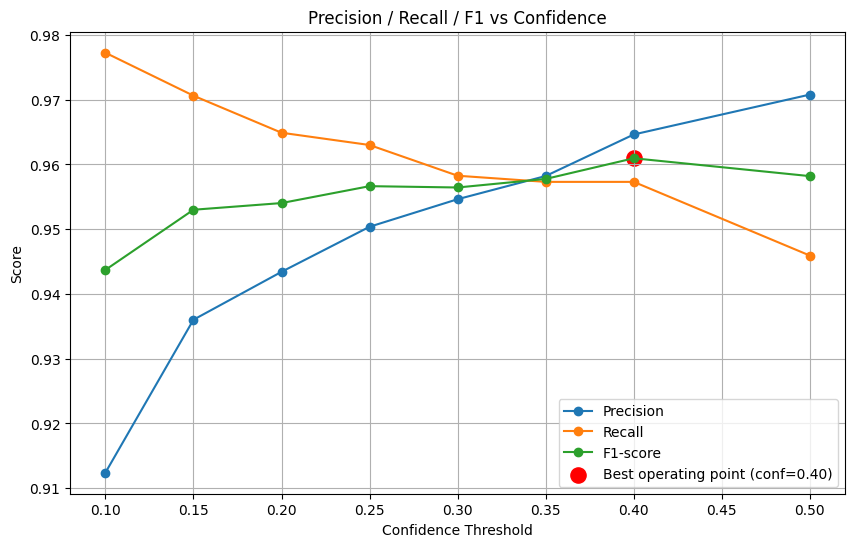

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(df["conf"], df["Precision"], marker="o", label="Precision")
plt.plot(df["conf"], df["Recall"],    marker="o", label="Recall")
plt.plot(df["conf"], df["F1"],        marker="o", label="F1-score")

# En iyi noktayı işaretleyelim (conf = 0.40)
best_conf = 0.40
best_f1 = df[df["conf"] == best_conf]["F1"].values[0]

plt.scatter([best_conf], [best_f1],
            color="red", s=120,
            label="Best operating point (conf=0.40)")

plt.xlabel("Confidence Threshold")
plt.ylabel("Score")
plt.title("Precision / Recall / F1 vs Confidence")
plt.legend()
plt.grid(True)

plt.show()

conf = 0.35 civarında precision, recall ve F1-score eğrilerinin birbirine çok yakın olduğu görülmektedir.
Bu nokta, modelin yanlış pozitifler ile kaçırılan yüzler arasında en dengeli davranışı sergilediği bölgeyi temsil etmektedir. 
Fakat en yüksek F1-score değeri conf = 0.40 seviyesinde elde edilmiştir.

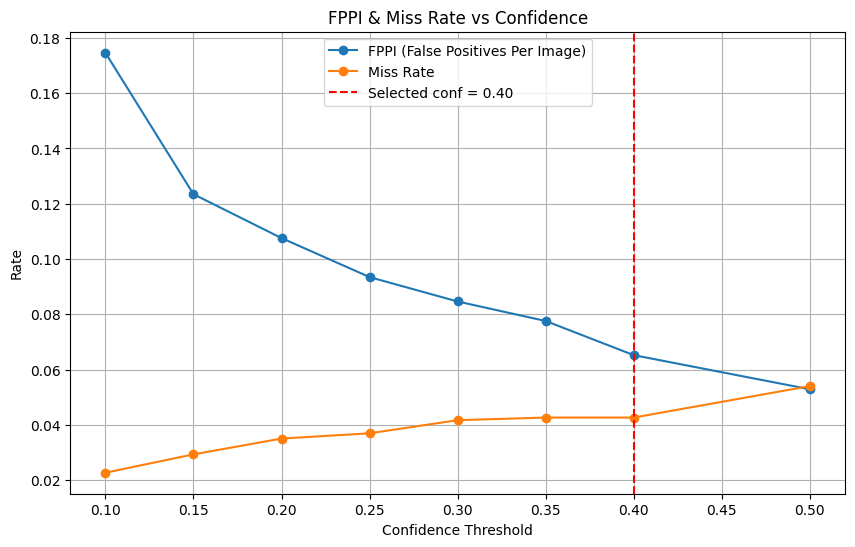

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(df["conf"], df["FPPI"],     marker="o", label="FPPI (False Positives Per Image)")
plt.plot(df["conf"], df["MissRate"], marker="o", label="Miss Rate")

plt.axvline(x=0.40, color="red", linestyle="--", label="Selected conf = 0.40")

plt.xlabel("Confidence Threshold")
plt.ylabel("Rate")
plt.title("FPPI & Miss Rate vs Confidence")
plt.legend()
plt.grid(True)

plt.show()

Confidence arttıkça FPPI düzenli şekilde azalıyor
- Daha yüksek eşik = daha az yanlış pozitif (daha az sahte yüz algısı)

Confidence arttıkça Miss Rate artıyor
- Daha katı eşik = bazı gerçek yüzler kaçırılıyor (recall düşüyor)

Bu klasik bir Precision–Recall trade-off davranışıdır.

## NMS & IOU OPTİMİZASYONU

In [22]:
# Amaç: Farklı NMS IoU ayarlarında modelin TP / FP / FN performansını ölçmek

import os
import numpy as np

# Ground Truth etiketlerinin bulunduğu klasör
GT_DIR = "face_detection/fddb_dataset_YOLO/labels/val"

# Değerlendirme için kullanılan IoU eşiği (eşleşme kriteri)
IOU_TH = 0.5


# YOLO formatındaki (xc, yc, w, h) kutuları yükle
def load_boxes(path):
    boxes = []
    if not os.path.exists(path):
        return np.zeros((0, 4))

    with open(path) as f:
        for line in f:
            parts = list(map(float, line.split()))
            x, y, w, h = parts[1:5]   # class bilgisini atlıyoruz
            boxes.append([x, y, w, h])

    return np.array(boxes)


# YOLO (xc, yc, w, h) → (x1, y1, x2, y2) dönüşümü
def xywh_to_xyxy(box):
    x, y, w, h = box
    return [
        x - w/2, y - h/2,
        x + w/2, y + h/2
    ]


# İki bounding box arasındaki IoU hesaplama
def compute_iou(box1, box2):
    x1_min, y1_min, x1_max, y1_max = xywh_to_xyxy(box1)
    x2_min, y2_min, x2_max, y2_max = xywh_to_xyxy(box2)

    inter_xmin = max(x1_min, x2_min)
    inter_ymin = max(y1_min, y2_min)
    inter_xmax = min(x1_max, x2_max)
    inter_ymax = min(y1_max, y2_max)

    # Kesişim yoksa IoU = 0
    if inter_xmax < inter_xmin or inter_ymax < inter_ymin:
        return 0.0

    inter_area = (inter_xmax - inter_xmin) * (inter_ymax - inter_ymin)
    area1 = (x1_max - x1_min) * (y1_max - y1_min)
    area2 = (x2_max - x2_min) * (y2_max - y2_min)

    return inter_area / (area1 + area2 - inter_area + 1e-6)


# Tahmin klasörünü analiz ederek TP / FP / FN say
def analyze_folder(pred_dir):
    tp, fp, fn = 0, 0, 0

    for lbl in os.listdir(GT_DIR):
        gt_path   = os.path.join(GT_DIR, lbl)
        pred_path = os.path.join(pred_dir, lbl)

        gt_boxes   = load_boxes(gt_path)
        pred_boxes = load_boxes(pred_path)

        # Ground truth var ama hiç tahmin yok → FN
        if len(gt_boxes) > 0 and len(pred_boxes) == 0:
            fn += len(gt_boxes)
            continue

        # Tahmin var ama ground truth yok → FP
        if len(gt_boxes) == 0 and len(pred_boxes) > 0:
            fp += len(pred_boxes)
            continue

        # İkisi de yoksa geç
        if len(gt_boxes) == 0 and len(pred_boxes) == 0:
            continue

        matched_gt = set()
        matched_pr = set()

        # IoU eşleşmesi ile TP / FN / FP hesapla
        for i, p in enumerate(pred_boxes):
            for j, g in enumerate(gt_boxes):
                iou = compute_iou(p, g)

                if iou >= IOU_TH and j not in matched_gt and i not in matched_pr:
                    matched_gt.add(j)
                    matched_pr.add(i)

        # TP: eşleşen ground truth sayısı
        tp += len(matched_gt)

        # FN: eşleşmeyen ground truth’lar
        fn += len(gt_boxes) - len(matched_gt)

        # FP: eşleşmeyen prediction’lar
        fp += len(pred_boxes) - len(matched_pr)

    return fp, fn, tp

In [23]:
#Amaç:Farklı NMS IoU eşiklerinde modelin Precision / Recall / F1 / FP / FN davranışını incelemek
from ultralytics import YOLO

# Test edilecek NMS IoU değerleri
ious = [0.3, 0.4, 0.5, 0.6, 0.7]
results_iou = []

for iou in ious:
    print(f"\n🔍 Running inference with NMS IoU = {iou}")

    model = YOLO("/home/q/.pyenv/runs/detect/train11/weights/best.pt")

    model.predict(
        source="face_detection/fddb_dataset_YOLO/images/val",
        conf=0.40,          # conf sabit
        iou=iou,
        save=False,
        save_txt=True,
        project="compare",
        name=f"iou_{iou}"
    )

    fp, fn, tp = analyze_folder(f"compare/iou_{iou}/labels")

    precision = tp / (tp + fp + 1e-6)
    recall    = tp / (tp + fn + 1e-6)
    f1        = 2 * precision * recall / (precision + recall + 1e-6)

    results_iou.append([iou, precision, recall, f1, fp, fn, tp])

    print(f"IoU={iou} | P={precision:.4f} R={recall:.4f} F1={f1:.4f} | FP={fp} FN={fn}")


🔍 Running inference with NMS IoU = 0.3

image 1/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_135.jpg: 640x480 2 faces, 4.6ms
image 2/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_141.jpg: 640x512 1 face, 4.6ms
image 3/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_198.jpg: 640x480 1 face, 4.6ms
image 4/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_230.jpg: 640x448 1 face, 4.5ms
image 5/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_278.jpg: 448x640 2 faces, 4.5ms
image 6/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_300.jpg: 640x448 2 faces, 4.7ms
image 7/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_392.jpg: 512x640 1 face, 4.8ms
image 8/567

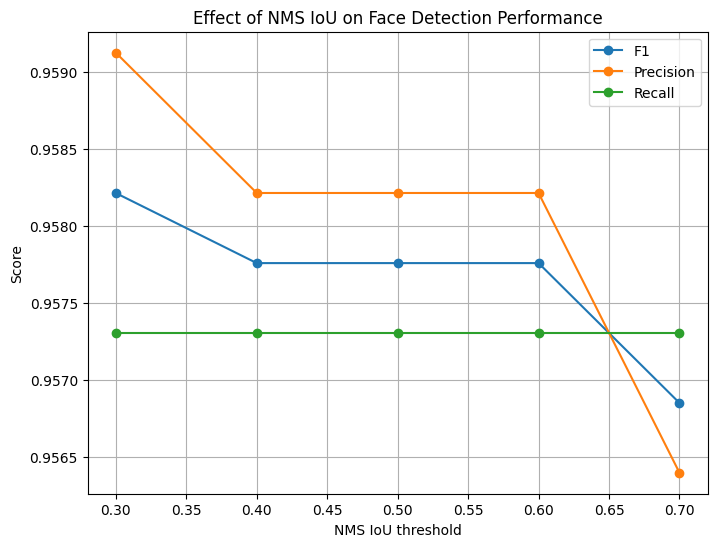

In [24]:
#BASELINE METRİKLERİ 
import pandas as pd

df_iou = pd.DataFrame(results_iou, columns=["iou", "precision", "recall", "f1", "fp", "fn", "tp"])
df_iou

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(df_iou["iou"], df_iou["f1"], marker="o", label="F1")
plt.plot(df_iou["iou"], df_iou["precision"], marker="o", label="Precision")
plt.plot(df_iou["iou"], df_iou["recall"], marker="o", label="Recall")

plt.xlabel("NMS IoU threshold")
plt.ylabel("Score")
plt.title("Effect of NMS IoU on Face Detection Performance")
plt.legend()
plt.grid(True)
plt.show()

Bu deneyde, modelin Non-Maximum Suppression (NMS) aşamasında kullanılan IoU eşiğinin, yüz tespit performansına etkisi incelenmiştir.
Confidence threshold sabit tutulmuştur (conf = 0.40)
Sadece NMS IoU değeri değiştirilmiştir (0.30 → 0.70)

Her ayar için:
True Positive (TP)
False Positive (FP)
False Negative (FN)
Precision, Recall ve F1-score hesaplanmıştır.

Amaç: Çok düşük IoU değerlerinde oluşan fazla kutu (yüksek FP) problemini, Çok yüksek IoU değerlerinde oluşan kaçırma (yüksek FN) problemini
dengeleyen en uygun NMS IoU eşiğini belirlemektir.

Yapılan deneylerde NMS IoU eşiğinin model davranışını doğrudan etkilediği gözlemlenmiştir.

Recall neredeyse sabit kalmıştır (0.957)
- Bu durum modelin yüzleri bulma kabiliyetinin zaten güçlü olduğunu göstermektedir.
- NMS IoU değişimi, kaçırılan yüz sayısını önemli ölçüde etkilememektedir.

Precision, IoU arttıkça düşmektedir
- Yüksek IoU değerlerinde (özellikle 0.70), NMS daha agresif çalışmakta ve
doğru tespitlerin de bastırılması sonucu bazı yanlış eşleşmeler oluşmaktadır.
- Bu durum fazla suppression → yanlış karar etkisini göstermektedir.

F1-score en yüksek değerine düşük IoU bölgesinde ulaşmaktadır
- IoU = 0.30 noktasında F1 maksimumdur.
- Bu değer precision ve recall arasında en dengeli noktayı temsil etmektedir.

In [29]:
from ultralytics import YOLO

# Baseline inference
model = YOLO("/home/q/.pyenv/runs/detect/train11/weights/best.pt")

model.predict(
    source="face_detection/fddb_dataset_YOLO/images/val",
    conf=0.25,     # default YOLO
    iou=0.50,
    save=False,
    save_txt=True,
    project="compare",
    name="final_baseline"
)

tp_b, fp_b, fn_b = analyze_folder("compare/final_baseline/labels")

def metrics(tp, fp, fn):
    precision = tp / (tp + fp + 1e-6)
    recall    = tp / (tp + fn + 1e-6)
    f1        = 2*precision*recall / (precision+recall+1e-6)
    return precision, recall, f1

p_b, r_b, f1_b = metrics(tp_b, fp_b, fn_b)

print("= BASELINE =")
print("TP:", tp_b, "FP:", fp_b, "FN:", fn_b)
print("Precision:", round(p_b,4), "Recall:", round(r_b,4), "F1:", round(f1_b,4))


image 1/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_135.jpg: 640x480 2 faces, 4.6ms
image 2/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_141.jpg: 640x512 1 face, 4.6ms
image 3/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_198.jpg: 640x480 1 face, 4.4ms
image 4/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_230.jpg: 640x448 1 face, 4.4ms
image 5/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_278.jpg: 448x640 2 faces, 4.5ms
image 6/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_300.jpg: 640x448 2 faces, 4.3ms
image 7/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_392.jpg: 512x640 1 face, 4.4ms
image 8/567 /home/q/Desktop/youtube/sude/face_detec

In [30]:
# Final tuned inference (BEST CONFIG)
model.predict(
    source="face_detection/fddb_dataset_YOLO/images/val",
    conf=0.40,     # best conf
    iou=0.30,      # best NMS IoU
    save=False,
    save_txt=True,
    project="compare",
    name="final_tuned"
)

tp_t, fp_t, fn_t = analyze_folder("compare/final_tuned/labels")

p_t, r_t, f1_t = metrics(tp_t, fp_t, fn_t)

print("=FINAL TUNED =")
print("TP:", tp_t, "FP:", fp_t, "FN:", fn_t)
print("Precision:", round(p_t,4), "Recall:", round(r_t,4), "F1:", round(f1_t,4))


image 1/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_135.jpg: 640x480 2 faces, 4.7ms
image 2/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_141.jpg: 640x512 1 face, 4.6ms
image 3/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_198.jpg: 640x480 1 face, 4.6ms
image 4/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_230.jpg: 640x448 1 face, 4.5ms
image 5/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_278.jpg: 448x640 2 faces, 5.0ms
image 6/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_300.jpg: 640x448 2 faces, 4.7ms
image 7/567 /home/q/Desktop/youtube/sude/face_detection/fddb_dataset_YOLO/images/val/2002_07_19_big_img_392.jpg: 512x640 1 face, 4.5ms
image 8/567 /home/q/Desktop/youtube/sude/face_detec

In [31]:
#SONUÇLARI KARŞILAŞTIRMA TABLOSU
import pandas as pd

final_table = pd.DataFrame([
    ["Baseline (conf=0.25, iou=0.50)", tp_b, fp_b, fn_b, p_b, r_b, f1_b],
    ["Tuned (conf=0.40, iou=0.30)",    tp_t, fp_t, fn_t, p_t, r_t, f1_t],
], columns=["Setting", "TP", "FP", "FN", "Precision", "Recall", "F1"])

final_table

,Setting,TP,FP,FN,Precision,Recall,F1
0,"Baseline (conf=0.25, iou=0.50)",1015,63,39,0.941558,0.962998,0.952157
1,"Tuned (conf=0.40, iou=0.30)",1009,43,45,0.959125,0.957306,0.958214


In [33]:
final_table.to_csv("final_results_comparison.csv", index=False)
print("Saved: final_results_comparison.csv")

Saved: final_results_comparison.csv


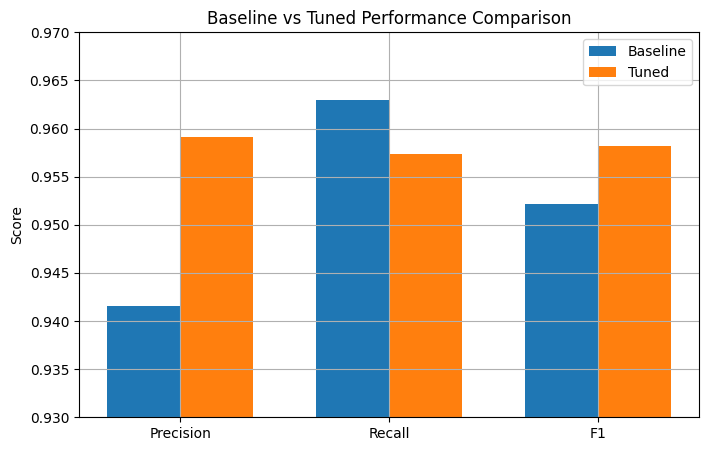

In [34]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["Precision", "Recall", "F1"]
baseline = [p_b, r_b, f1_b]
tuned    = [p_t, r_t, f1_t]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, baseline, width, label="Baseline")
plt.bar(x + width/2, tuned,    width, label="Tuned")

plt.xticks(x, labels)
plt.ylim(0.93, 0.97)
plt.ylabel("Score")
plt.title("Baseline vs Tuned Performance Comparison")
plt.legend()
plt.grid(True)

plt.show()

Bu sonuç, eğitim sürecine dokunmadan yalnızca inference ve post-processing ayarlarının optimize edilmesiyle
anlamlı bir performans iyileştirmesi elde edilebileceğini göstermektedir.